In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Coordinator Load With Leader Death
We run a full etcd cluster with continuous checkpointing.
500 clients, each with a unique query, spread across 10 brokers.
All 500 clients are started and the system is allowed to stabilize.
Each client subscribes to 10% of the publishers in the system.
We begin adding publishers to the system.
Each broker submits a new publisher with a delay uniformly spread between [50, 500] ms until there are 1000 total publishers in the system.
We kill the leader and allow it to fail over.
Latency is measured as time the publish message is sent until time that the broker receives the subscriptiondiffmessage.

21816.2967446


,start_time,latency
count,88727.000000,88727.000000
mean,159.140746,2269.057745
std,91.421960,5282.308758
min,0.000000,24.848007
25%,78.883592,47.879855
50%,158.400362,75.915225
75%,239.996590,248.011644
max,298.082556,27774.533369


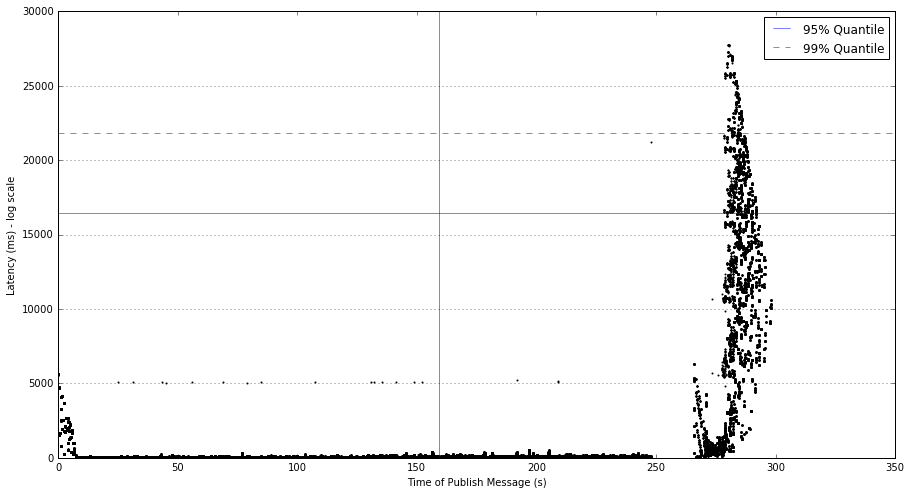

In [51]:
datafile = "data/brokerLatencyManyPublishersChangeMD-long-etcd-leaderDeath-30-300.csv"
df = pd.read_csv(datafile,header=None)
df.columns=['start_time', 'latency']
df['latency'] /= float(1e6) # convert to milliseconds
df['start_time'] /= float(1e9) # convert to seconds
df = df[df['latency'] < 1e5]
min_start_time = df['start_time'].min()
df['start_time'] = df['start_time'].map(lambda t: t - min_start_time)
ax = df.plot(kind='scatter', x='start_time', y='latency', figsize=(15,8), s=1, c='black')
#ax.set_title("Latency to Handle Publish")
#ax.set_yscale('log')
ax.set_ylabel("Latency (ms) - log scale")
ax.set_xlabel("Time of Publish Message (s)")
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.grid(axis='y', which='major')
#ax.axhline(y=df['latency'].quantile(q=0.50),c="blue",linewidth=0.5)
#ax.axhline(y=df['latency'].quantile(q=0.75),c="blue",linewidth=0.5)
ax.axhline(y=df['latency'].quantile(q=0.95),c="blue",linewidth=0.5)
ax.axhline(y=df['latency'].quantile(q=0.99),linestyle='dashed',linewidth=0.5)
republish_switch_time = 1462437292458576882/1e9
ax.axvline(x=republish_switch_time-min_start_time,linewidth=0.5)
ax.legend(['95% Quantile', '99% Quantile'])
print df['latency'].quantile(q=0.99)
df.describe()

447.91644953


,start_time,latency
count,89830.000000,89830.000000
mean,257.775392,95.478344
std,140.701009,273.348483
min,0.000000,25.785787
25%,132.372227,42.413666
50%,268.785404,60.342734
75%,391.215763,90.700581
max,460.926421,7066.640025


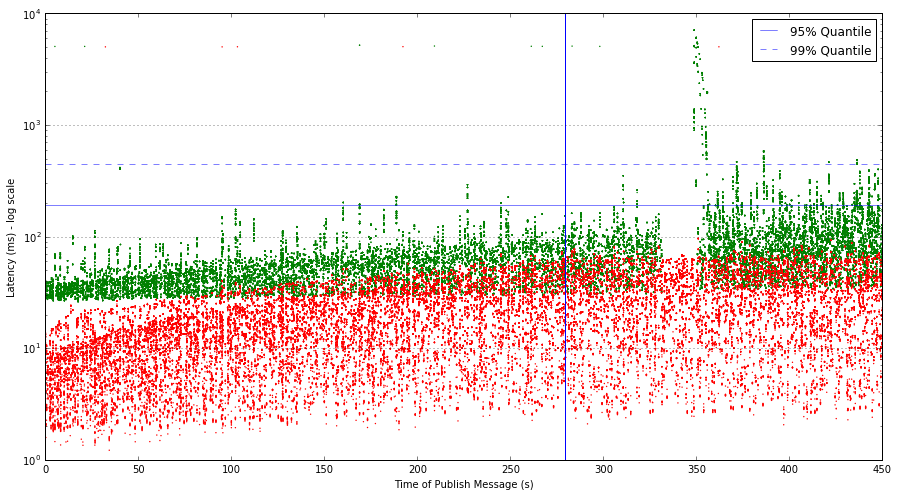

In [67]:
datafile = "data/brokerLatencyManyPublishersChangeMD-long-etcd-leaderDeath-50-500.csv"
noetcd_datafile = "data/brokerLatencyManyPublishersChangeMD-long-noetcd-leaderDeath-50-500.csv"
df = pd.read_csv(datafile,header=None)
noetcd_df = pd.read_csv(noetcd_datafile,header=None)
df.columns=['start_time', 'latency']
noetcd_df.columns=['start_time', 'latency']
noetcd_df['latency'] /= float(1e6) # convert to milliseconds
noetcd_df['start_time'] /= float(1e9) # convert to seconds
noetcd_df = noetcd_df[noetcd_df['latency'] < 1e5]
noetcd_min_start_time = noetcd_df['start_time'].min()
noetcd_df['start_time'] = noetcd_df['start_time'].map(lambda t: t - noetcd_min_start_time)
df['latency'] /= float(1e6) # convert to milliseconds
df['start_time'] /= float(1e9) # convert to seconds
df = df[df['latency'] < 1e5]
min_start_time = df['start_time'].min()
df['start_time'] = df['start_time'].map(lambda t: t - min_start_time)
ax = df.plot(kind='scatter', x='start_time', y='latency', figsize=(15,8), s=2, c='green', edgecolors='none', label='Etcd')
ax.scatter(noetcd_df['start_time'], noetcd_df['latency'], s=2, c='red', edgecolors='none')
#ax.set_title("Latency to Handle Publish")
ax.set_yscale('log')
ax.set_ylabel("Latency (ms) - log scale")
ax.set_xlabel("Time of Publish Message (s)")
ax.set_xlim(xmin=0, xmax=450)
ax.set_ylim(ymin=1)
ax.grid(axis='y', which='major')
#ax.axhline(y=df['latency'].quantile(q=0.50),c="blue",linewidth=0.5)
#ax.axhline(y=df['latency'].quantile(q=0.75),c="blue",linewidth=0.5)
ax.axhline(y=df['latency'].quantile(q=0.95),c="blue",linewidth=0.5)
ax.axhline(y=df['latency'].quantile(q=0.99),linestyle='dashed',linewidth=0.5)
republish_switch_time = 1462438418753251298/1e9
ax.axvline(x=republish_switch_time-min_start_time,linewidth=1)
ax.legend(['95% Quantile', '99% Quantile'])
print df['latency'].quantile(q=0.99)
df.describe()

431.33213661


,start_time,latency
count,49300.000000,49300.000000
mean,116865.604348,89.610937
std,56082.534270,287.105839
min,0.000000,23.195549
25%,66918.826660,35.336152
50%,126402.573975,46.678953
75%,161944.818115,68.602758
max,207092.906494,6107.644440


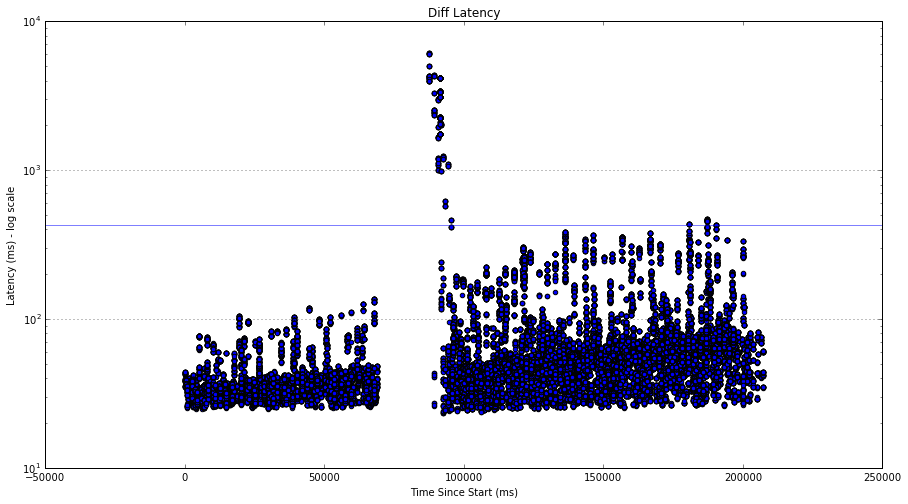

In [31]:
datafile = "data/brokerLatencyManyPublishers-long-etcd-leaderDeath.csv"
df = pd.read_csv(datafile,header=None)
df.columns=['start_time', 'latency']
df['latency'] /= float(1e6) # convert to milliseconds
df['start_time'] /= float(1e6) # convert to milliseconds
df = df[df['latency'] < 1e6]
min_start_time = df['start_time'].min()
df['start_time'] = df['start_time'].map(lambda t: t - min_start_time)
ax = df.plot(kind='scatter', x='start_time', y='latency', figsize=(15,8))
ax.set_title("Diff Latency")
ax.set_yscale('log')
ax.set_ylabel("Latency (ms) - log scale")
ax.set_xlabel("Time Since Start (ms)")
#ax.set_xlim([0, 80000])
ax.grid(axis='y', which='major')
#ax.axhline(y=df['latency'].quantile(q=0.50),c="blue",linewidth=0.5)
#ax.axhline(y=df['latency'].quantile(q=0.75),c="blue",linewidth=0.5)
#ax.axhline(y=df['latency'].quantile(q=0.95),c="blue",linewidth=0.5)
ax.axhline(y=df['latency'].quantile(q=0.99),c="blue",linewidth=0.5)
print df['latency'].quantile(q=0.99)
df.describe()